In [2]:
import h5py
import os
import numpy as np

currentpath = os.getcwd()
path = currentpath + '/InOut_50X50'
print("currentpath:", currentpath,"path:", path)

def obtainFilesL(path):
    filesL = []
    for f in os.listdir(path):
        filesL.append(f)
    return filesL
filesL = obtainFilesL(path)  
print("len(filesL):", len(filesL))

def obtainTimelables(filesL):
    data = '201504'
    timelabels = []
    for d in range(len(filesL)):
    #for d in range(17):
        day = filesL[d][5:7]
        for h in range(24):
            if (h%2 == 0):
                if len(str(h+2))<2:
                    temp = data +day +'0'+str(h+2)
                else:
                    temp = data +day +str(h+2)
                timelabels.append(int(temp))
    return timelabels

timelabels = obtainTimelables(filesL)
print("len(timelabels):", len(timelabels))
print(timelabels[:13])

currentpath: Z:\liyanliu\traDataNew path: Z:\liyanliu\traDataNew/InOut_50X50
len(filesL): 30
len(timelabels): 360
[2015040102, 2015040104, 2015040106, 2015040108, 2015040110, 2015040112, 2015040114, 2015040116, 2015040118, 2015040120, 2015040122, 2015040124, 2015040202]


In [3]:
dataset = []
for i in range(len(filesL)):
#for i in range(1):
    filePath = path + '/'+ filesL[i]
    #print(filePath)
    f = h5py.File(filePath)
    for ke in f.keys():
        #print(ke,f[ke][0].shape)
        print("i,ke, f[ke].shape:   ", i,ke, f[ke].shape)
        dataset.append(f[ke])      

i,ke, f[ke].shape:    0 data (144, 2, 50, 50)
i,ke, f[ke].shape:    1 data (144, 2, 50, 50)
i,ke, f[ke].shape:    2 data (144, 2, 50, 50)
i,ke, f[ke].shape:    3 data (144, 2, 50, 50)
i,ke, f[ke].shape:    4 data (144, 2, 50, 50)
i,ke, f[ke].shape:    5 data (144, 2, 50, 50)
i,ke, f[ke].shape:    6 data (144, 2, 50, 50)
i,ke, f[ke].shape:    7 data (144, 2, 50, 50)
i,ke, f[ke].shape:    8 data (144, 2, 50, 50)
i,ke, f[ke].shape:    9 data (144, 2, 50, 50)
i,ke, f[ke].shape:    10 data (144, 2, 50, 50)
i,ke, f[ke].shape:    11 data (144, 2, 50, 50)
i,ke, f[ke].shape:    12 data (144, 2, 50, 50)
i,ke, f[ke].shape:    13 data (144, 2, 50, 50)
i,ke, f[ke].shape:    14 data (144, 2, 50, 50)
i,ke, f[ke].shape:    15 data (144, 2, 50, 50)
i,ke, f[ke].shape:    16 data (144, 2, 50, 50)
i,ke, f[ke].shape:    17 data (144, 2, 50, 50)
i,ke, f[ke].shape:    18 data (144, 2, 50, 50)
i,ke, f[ke].shape:    19 data (144, 2, 50, 50)
i,ke, f[ke].shape:    20 data (144, 2, 50, 50)
i,ke, f[ke].shape:    2

In [9]:
N = len(filesL)*12
inOutTk = np.zeros((N, 2, 50, 50))
print("inOutTk.shape:", inOutTk.shape, "N:", N)

m = 0
initial = np.zeros((2,50,50))
for n in range(len(dataset)):
    for j in range(12):
        for i in np.arange(j*12,(j+1)*12):
            temp = initial+dataset[0][i]
            initial = temp
        print(n,i,j,sum(sum(sum(initial))), "m:", m)
        inOutTk[m] = initial
        m = m+1
        initial = initial = np.zeros((2,50,50)) 
    print()  
    
for i in range(len(inOutTk)):
    print(i,sum(sum(sum(inOutTk[i]))))

inOutTk.shape: (360, 2, 50, 50) N: 360
0 11 0 41066.0 m: 0
0 23 1 21966.0 m: 1
0 35 2 38880.0 m: 2
0 47 3 41758.0 m: 3
0 59 4 65170.0 m: 4
0 71 5 65686.0 m: 5
0 83 6 64760.0 m: 6
0 95 7 65330.0 m: 7
0 107 8 60834.0 m: 8
0 119 9 63728.0 m: 9
0 131 10 64604.0 m: 10
0 143 11 63572.0 m: 11

1 11 0 41066.0 m: 12
1 23 1 21966.0 m: 13
1 35 2 38880.0 m: 14
1 47 3 41758.0 m: 15
1 59 4 65170.0 m: 16
1 71 5 65686.0 m: 17
1 83 6 64760.0 m: 18
1 95 7 65330.0 m: 19
1 107 8 60834.0 m: 20
1 119 9 63728.0 m: 21
1 131 10 64604.0 m: 22
1 143 11 63572.0 m: 23

2 11 0 41066.0 m: 24
2 23 1 21966.0 m: 25
2 35 2 38880.0 m: 26
2 47 3 41758.0 m: 27
2 59 4 65170.0 m: 28
2 71 5 65686.0 m: 29
2 83 6 64760.0 m: 30
2 95 7 65330.0 m: 31
2 107 8 60834.0 m: 32
2 119 9 63728.0 m: 33
2 131 10 64604.0 m: 34
2 143 11 63572.0 m: 35

3 11 0 41066.0 m: 36
3 23 1 21966.0 m: 37
3 35 2 38880.0 m: 38
3 47 3 41758.0 m: 39
3 59 4 65170.0 m: 40
3 71 5 65686.0 m: 41
3 83 6 64760.0 m: 42
3 95 7 65330.0 m: 43
3 107 8 60834.0 m: 44
3 11

In [12]:
# 网格减半
def reduceGrid(inOutTk):
    inOutTk_new = np.zeros((360,2,25,25))
    for i in range(len(inOutTk)):
    # for i in range(2):
        for j in range(len(inOutTk[i])):
            Tk_inOut = inOutTk[i][j]
    #         print("Tk_inOut.shape:", Tk_inOut.shape)
            intermediate = np.zeros((25,50))
    #         print("intermediate.shape:", intermediate.shape)
            m = n = 0
            for row in range(len(Tk_inOut)):
                if row%2 == 0:
                    intermediate[m][:] = Tk_inOut[row,:]+Tk_inOut[row+1,:]
                    m += 1
            for col in range(intermediate.shape[1]):
                if col%2 == 0:
                    inOutTk_new[i][j][n] = intermediate[:,col] + intermediate[:,col+1]
                    n += 1
    return inOutTk_new

inOutTk_new = reduceGrid(inOutTk)
print(inOutTk_new.shape)

(360, 2, 25, 25)


In [4]:
# 张量的构建，网格x特征x时间(625X1250X12) = 流进/流出
def tensor(i,inOutTk):
    A_in = inOutTk[i][0]
    A_out = inOutTk[i][1]
    print("i:",i)
    print("A_in.shape:", A_in.shape, "A_out.shape:",A_out.shape)
    
    colum = A_in.shape[0]*A_in.shape[1]
    A_in = A_in.reshape(1,colum)
    A_out = A_out.reshape(1,colum)
    print("A_in.shape:", A_in.shape, "A_out.shape:",A_out.shape),print()
    
    [index_in,index_out] = [np.where(A_in[0] > 0)[0], np.where(A_out[0] > 0)[0]]
    [value_in, value_out] = [[int(A_in[0][index_in[i]]) for i in range(len(index_in))],\
                             [int(A_out[0][index_out[i]]) for i in range(len(index_out))]]
    return index_in, index_out, value_in, value_out

index_in, index_out, value_in, value_out = tensor(0,inOutTk_new)

with open(currentpath+"/tensorData/tensor1.csv",'w') as f:
    for i in range(len(index_in)):
        f.write(str(index_in[i])+','+str(index_in[i])+','+str(1)+','+str((value_in[i]))+'\n')
    for j in range(len(index_out)):
        f.write(str(index_out[j])+','+str(index_out[j]+625)+','+str(1)+','+str((value_out[j]))+'\n')
    print("存储完毕？！")

for h in range(1,12):
    index_in, index_out, value_in, value_out = tensor(h,inOutTk_new)
    with open(currentpath+"/tensorData/tensor1.csv",'a+') as f:
        for i in range(len(index_in)):
            f.write(str(index_in[i])+','+str(index_in[i])+','+str(h+1)+','+str((value_in[i]))+'\n')
        for j in range(len(index_out)):
            f.write(str(index_out[j])+','+str(index_out[j]+625)+','+str(h+1)+','+str((value_out[j]))+'\n')
print("一天数据存储完毕？！")

len(inOutFlow): 360
inOutFlow_max: 92850.0
inOutFlow_min: 30721.0
[0.4489529849184761, 0.0, 0.11080171900400779, 0.48355840267829836, 0.8845305734842023, 0.9925799546105684, 0.9710602134269021, 1.0, 0.8961515556342449, 0.9478987268425373]


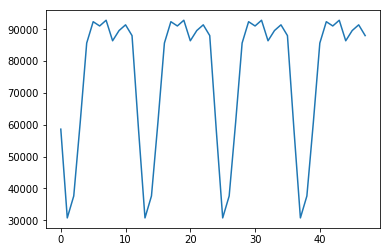

In [56]:
inOutFlow = []
for i in range(len(inOutTk)):
    S = int(sum(sum(sum(inOutTk[i]))))
    inOutFlow.append(S/2)
print("len(inOutFlow):",len(inOutFlow))

inOutFlow_max = max(inOutFlow)
print("inOutFlow_max:",inOutFlow_max)
inOutFlow_min = min(inOutFlow)
print("inOutFlow_min:", inOutFlow_min)
update_inOutFlow = [(inOutFlow[i]-inOutFlow_min)/(inOutFlow_max - inOutFlow_min) for i in range(len(inOutFlow))]
print(update_inOutFlow[:10])

import matplotlib.pyplot as plt
plt.plot(inOutFlow[72:120])

In [13]:
print(inOutTk.shape)
print(inOutTk[0][0])
a = inOutTk[0][0].reshape(1,10000)


(360, 2, 100, 100)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [140]:
#存储数据
# f = h5py.File("HZ15_M100x100_InOut_hour=2.hdf5", "w")
# f['data'] = inOutTk
# f['labels'] = timelabels

In [142]:
import h5py
import os
import numpy as np

f = h5py.File('HZ15_M100x100_InOut_hour=2.hdf5','r')
for ke in f.keys():
    print(ke, f[ke].shape)
    
data = f['data'].value
timelabel = f['labels'].value

print(len(timelabel))
print(data.shape)

data (360, 2, 100, 100)
labels (360,)
360
(360, 2, 100, 100)


In [144]:
data[0].shape

(2, 100, 100)